# What was the impact of the Medicaid expansion on the uninsured rate?

**1. As of today, which states have implemented the Medicaid expansion under the Affordable Care Act, and which have not? To answer, produce a table of state implementation dates for the Medicaid expansion, and include in your table states that have not implemented at this point. Produce your own table (don’t just copy paste from elsewhere), and cite whatever sources you used to produce this table.**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_implementation = pd.read_csv('expansion_dates.csv')
df_implementation

,State,Expansion Date
0,Alabama,not implemented
1,Alaska,9/1/15
2,Arizona,1/1/14
3,Arkansas,1/1/14
4,California,"Early expansion: 11/1/2010, 1/1/2014*"
5,Colorado,1/1/14
6,Connecticut,"Early expansion: 4/1/2010, 1/1/2014*"
7,Delaware,1/1/14
8,District of Columbia,1/1/14
9,Florida,not implemented


***Sources:***

https://www.kff.org/health-reform/state-indicator/state-activity-around-expanding-medicaid-under-the-affordable-care-act/

https://www.kff.org/health-reform/issue-brief/states-getting-a-jump-start-on-health/

http://www.shadac.org/news/medicaid-“early-opt-in”-states

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4769999/

*expansion_dates.csv* is a file I constructed by hand from the above sources.

Note: An asterisk * denotes a state that expanded Medicaid early, from 2010-2013, under provisions of the Affordable Care Act. Details on early expansion states can be found in 2nd-4th links above. Placing a precise date on the expansion for these early states is difficult because in many cases they phased in different provisions at different times or in only some parts of each state. In the main KFF table of expansion dates, these early states are listed as 1/1/14 for clarity, as this is the date when all provisions of the expansion were fully in place for these early states. 

**2. We are interested in better understanding the evolution of the state-level uninsured rate over time in states that expanded Medicaid versus states that did not. Navigate to
https://www.census.gov/data/tables/time-series/demo/health-insurance/historical-series/hic.html.**

**What table will be best to use to study this question? Download it.**


We want HIC-4, Health Insurance Coverage Status and Type of Coverage by State--All Persons: 2008 to 2019 (hic04_acs.xlsx). This is based on the ACS, which the Census indicates is better for "single-year estimates of health insurance at the state level." We want the "All Persons" table because we are interested in the total uninsured rate. 

Below, I have read in using pd.read_excel, and set parameters to read it in as a relatively easy-to-use dataframe.

You could have transformed your Excel sheet to a useful dataset in any number of ways, including (though this isn't ideal) pre-processing in Excel before importing into Stata or Python. The way I imported and transformed in the attached code is only one of many options.

In [2]:
hic04_acs = 'https://www2.census.gov/programs-surveys/demo/tables/health-insurance/time-series/acs/hic04_acs.xlsx'
df_insurance = pd.read_excel(hic04_acs, index_col=[0,1], header=4, skipfooter=5)
df_insurance

Estimate Margin of error  Percent  \
United States Total                323121              18    100.0   
              Any coverage         293482             210     90.8   
              Uninsured             29639             210      9.2   
              Private              217812             446     67.4   
              ..Employer-based     178919             404     55.4   
...                                   ...             ...      ...   
Wyoming       ..Direct-purchase        91               7     16.0   
              ..TRICARE                22               3      3.9   
              Public                  166               5     29.2   
              ..Medicaid               66               5     11.7   
              ..Medicare              106               2     18.6   

                                Margin of error.1  Estimate.1  \
United States Total                             0      322249   
              Any coverage                    0.1      293684   
              Uninsured                       0.1       28566   
              Private                         0.1      217623   
              ..Employer-based                0.1      177740   
...                                           ...         ...   
Wyoming       ..Direct-purchase               1.2          89   
              ..TRICARE                       0.6          23   
              Public                          0.9         155   
              ..Medicaid                      0.9          58   
              ..Medicare                      0.4         102   

                                Margin of error.2  Percent.1  \
United States Total                            15      100.0   
              Any coverage                    178       91.1   
              Uninsured                       183        8.9   
              Private                         404       67.5   
              ..Employer-based                354       55.2   
...                                           ...        ...   
Wyoming       ..Direct-purchase                 6       15.7   
              ..TRICARE                         4        4.1   
              Public                            6       27.3   
              ..Medicaid                        5       10.3   
              ..Medicare                        3       18.0   

                                Margin of error.3  Estimate.2  \
United States Total                             0      320775   
              Any coverage                    0.1      292756   
              Uninsured                       0.1       28019   
              Private                         0.1      216952   
              ..Employer-based                0.1      176319   
...                                           ...         ...   
Wyoming       ..Direct-purchase               1.1          89   
              ..TRICARE                       0.6          20   
              Public                            1         161   
              ..Medicaid                      0.9          69   
              ..Medicare                      0.4          98   

                                Margin of error.4  ...  Percent.9  \
United States Total                            15  ...      100.0   
              Any coverage                    184  ...       84.5   
              Uninsured                       188  ...       15.5   
              Private                         419  ...       65.8   
              ..Employer-based                358  ...       54.9   
...                                           ...  ...        ...   
Wyoming       ..Direct-purchase                 5  ...       13.4   
              ..TRICARE                         3  ...        3.7   
              Public                            6  ...       26.0   
              ..Medicaid                        6  ...       12.8   
              ..Medicare                        2  ...       13.3   

                                

Although all you need to do at this point is download and display this table, you can see that you are missing some important column header information - the year, which was contained in an earlier row. 

I'll go ahead and fix this.

First, note it is easy to rename columns in a pandas dataframe. Below I create an example dataframe and show how easy it is to rename the columns using a list.

In [3]:
# Fake example dataframe
df_example = pd.DataFrame({'colA': ['a', 'b'], 'colB': ['c', 'd']})
df_example

,colA,colB
0,a,c
1,b,d


In [4]:
# Column names are stored in a list as a property of the data frame:
df_example.columns

Index(['colA', 'colB'], dtype='object')

In [5]:
# You can simply overwrite df.columns with a desired new list of column names: 
df_example.columns = ['My New Column Name A', 'My New Column Name B']
df_example

,My New Column Name A,My New Column Name B
0,a,c
1,b,d


Returning to my actual data, I'll print out the excel sheet unmodified, to inspect it: 

In [6]:
pd.read_excel(hic04_acs).head()

,Table with row headers in column A and column headers in rows 4 through 5,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,Table HIC-4_ACS. Health Insurance Coverage Sta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Note: Numbers in thousands. Civilian noninstit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nation/State,Coverage,2019,NaN,NaN,NaN,2018,NaN,NaN,NaN,...,NaN,NaN,2009,NaN,NaN,NaN,2008,NaN,NaN,NaN
3,NaN,NaN,Estimate,Margin of error,Percent,Margin of error,Estimate,Margin of error,Percent,Margin of error,...,Percent,Margin of error,Estimate,Margin of error,Percent,Margin of error,Estimate,Margin of error,Percent,Margin of error
4,United States,Total,323121,18,100,0,322249,15,100,0,...,100,0,301472,23,100,0,298571,20,100,0


Looks like I have four columns for each year, starting from 2017 and working back to 2008.  I'll print my column names to see what I have and what's missing:

In [7]:
# What are my column names?
df_insurance.columns

Index(['Estimate', 'Margin of error', 'Percent', 'Margin of error.1',
       'Estimate.1', 'Margin of error.2', 'Percent.1', 'Margin of error.3',
       'Estimate.2', 'Margin of error.4', 'Percent.2', 'Margin of error.5',
       'Estimate.3', 'Margin of error.6', 'Percent.3', 'Margin of error.7',
       'Estimate.4', 'Margin of error.8', 'Percent.4', 'Margin of error.9',
       'Estimate.5', 'Margin of error.10', 'Percent.5', 'Margin of error.11',
       'Estimate.6', 'Margin of error.12', 'Percent.6', 'Margin of error.13',
       'Estimate.7', 'Margin of error.14', 'Percent.7', 'Margin of error.15',
       'Estimate.8', 'Margin of error.16', 'Percent.8', 'Margin of error.17',
       'Estimate.9', 'Margin of error.18', 'Percent.9', 'Margin of error.19',
       'Estimate.10', 'Margin of error.20', 'Percent.10', 'Margin of error.21',
       'Estimate.11', 'Margin of error.22', 'Percent.11',
       'Margin of error.23'],
      dtype='object')

The easiest - though definitely not the most elegant - way to modify these column names to include the date is just making a new column name list by hand. 

First, I want to just grab the columns I actually need - that will be the easiest way to then rename them. I only want the percent columns, so I will grab them by subsetting the dataframe, like so:

In [8]:
# Note what this first line does - it's called a list comprehension, and 
# it quickly made a list only of the 'Percent' columns. You could have also made
# a list by hand yourself

use_cols = [x for x in df_insurance.columns if x.startswith('Percent')]
use_cols

['Percent',
 'Percent.1',
 'Percent.2',
 'Percent.3',
 'Percent.4',
 'Percent.5',
 'Percent.6',
 'Percent.7',
 'Percent.8',
 'Percent.9',
 'Percent.10',
 'Percent.11']

In [9]:
df_insurance = df_insurance[use_cols]
df_insurance

Percent  Percent.1  Percent.2  Percent.3  \
United States Total                100.0      100.0      100.0      100.0   
              Any coverage          90.8       91.1       91.3       91.4   
              Uninsured              9.2        8.9        8.7        8.6   
              Private               67.4       67.5       67.6       67.8   
              ..Employer-based      55.4       55.2       55.0       54.7   
...                                  ...        ...        ...        ...   
Wyoming       ..Direct-purchase     16.0       15.7       15.6       16.3   
              ..TRICARE              3.9        4.1        3.6        3.3   
              Public                29.2       27.3       28.3       27.3   
              ..Medicaid            11.7       10.3       12.2       12.1   
              ..Medicare            18.6       18.0       17.3       16.3   

                                 Percent.4  Percent.5  Percent.6  Percent.7  \
United States Total                  100.0      100.0      100.0      100.0   
              Any coverage            90.6       88.3       85.5       85.2   
              Uninsured                9.4       11.7       14.5       14.8   
              Private                 67.5       66.4       65.0       65.1   
              ..Employer-based        54.4       54.2       54.0       54.6   
...                                    ...        ...        ...        ...   
Wyoming       ..Direct-purchase       16.5       14.5       13.1       14.5   
              ..TRICARE                3.4        3.3        3.6        3.5   
              Public                  26.4       26.0       25.2       27.5   
              ..Medicaid              12.0       12.5       11.0       13.9   
              ..Medicare              15.5       15.0       14.6       14.8   

                                 Percent.8  Percent.9  Percent.10  Percent.11  
United States Total                  100.0      100.0       100.0       100.0  
              Any coverage            84.9       84.5        84.9        85.4  
              Uninsured               15.1       15.5        15.1        14.6  
              Private                 65.2       65.8        67.4        69.6  
              ..Employer-based        54.7       54.9        56.6        58.7  
...                                    ...        ...         ...         ...  
Wyoming       ..Direct-purchase       12.8       13.4        16.1        17.1  
              ..TRICARE                3.9        3.7         3.9         3.8  
              Public                  24.9       26.0        25.1        24.6  
              ..Medicaid              11.5       12.8        12.0        11.4  
              ..Medicare              14.3       13.3        13.7        13.5  

[571 rows x 12 columns]

In [10]:
# Now I will make a list of new column names using a list comprehension

new_column_names = [x for x in range(2019, 2007, -1)]
new_column_names

[2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008]

And then assign that column list to the data frame

In [11]:
df_insurance.columns = new_column_names
df_insurance

2019   2018   2017   2016   2015   2014  \
United States Total              100.0  100.0  100.0  100.0  100.0  100.0   
              Any coverage        90.8   91.1   91.3   91.4   90.6   88.3   
              Uninsured            9.2    8.9    8.7    8.6    9.4   11.7   
              Private             67.4   67.5   67.6   67.8   67.5   66.4   
              ..Employer-based    55.4   55.2   55.0   54.7   54.4   54.2   
...                                ...    ...    ...    ...    ...    ...   
Wyoming       ..Direct-purchase   16.0   15.7   15.6   16.3   16.5   14.5   
              ..TRICARE            3.9    4.1    3.6    3.3    3.4    3.3   
              Public              29.2   27.3   28.3   27.3   26.4   26.0   
              ..Medicaid          11.7   10.3   12.2   12.1   12.0   12.5   
              ..Medicare          18.6   18.0   17.3   16.3   15.5   15.0   

                                  2013   2012   2011   2010   2009   2008  
United States Total              100.0  100.0  100.0  100.0  100.0  100.0  
              Any coverage        85.5   85.2   84.9   84.5   84.9   85.4  
              Uninsured           14.5   14.8   15.1   15.5   15.1   14.6  
              Private             65.0   65.1   65.2   65.8   67.4   69.6  
              ..Employer-based    54.0   54.6   54.7   54.9   56.6   58.7  
...                                ...    ...    ...    ...    ...    ...  
Wyoming       ..Direct-purchase   13.1   14.5   12.8   13.4   16.1   17.1  
              ..TRICARE            3.6    3.5    3.9    3.7    3.9    3.8  
              Public              25.2   27.5   24.9   26.0   25.1   24.6  
              ..Medicaid          11.0   13.9   11.5   12.8   12.0   11.4  
              ..Medicare          14.6   14.8   14.3   13.3   13.7   13.5  

[571 rows x 12 columns]

**3. Think about some hypotheses for what might happen to overall state-level rates of uninsurance when a state expands the Medicaid program. What would have to be true for the uninsured rate to decrease after a state expands Medicaid? Increase? Have no impact?**

The most obvious hypothesis is that expanding Medicaid will reduce a state's overall uninsured rate. The expansion provides low-income individuals who were not previously eligible for Medicaid access to free health insurance. All other things equal, we expect this would reduce uninsurance rates.

For it to be true that the Medicaid expansion had no impact on the uninsurance rate, it could be the case that people did not take-up the program despite it being newly available to them. For example, in the Oregon Medicaid expansion that we discussed in class (which predated the ACA Medicaid expansion) 2/3 of people who won the lottery did not take up Medicaid. If these effects were even more extreme in other states, and most newly-eligible people do not actually enroll in Medicaid, we might not detect any impact on the overall uninsured rate.

It could also be the case that the Medicaid expansion has no effect on the total uninsured rate because of *crowd-out*. Suppose that newly-eligible low income individuals typically are offered insurance by their employer, but after the Medicaid expansion, those employers dropped their insurance offerings. The net effect on the total uninsured rate would be zero. There could also in theory be crowd-out of insurance purchased directly by these low-income individuals. 

For it to be true that the Medicaid expansion actually *increased* the total uninsured rate, there would have to be complicated and large-magnitude crowd-out dynamics. Suppose that the existence of the Medicaid expansion induced employers of low-income individuals to drop health insurance, but then those individuals did not actually sign up for Medicaid. The expansion could in theory thus result in a net increase in the uninsurance rate.

There is a brief discussion of the literature on crowd-out here, with accompanying links:


https://www.kff.org/medicaid/issue-brief/the-effects-of-medicaid-expansion-under-the-aca-updated-findings-from-a-literature-review-march-2018/

**4. Produce an informative graph of the uninsured rate over time that helps us understand better the relationship between the expansion of Medicaid and state-level uninsurance rates. In order to create a compelling graph, you will need to think about grouping states into a few natural and useful categories. A graph with 50 lines, one for each state, is not easy to read or understand!**

First, we might want to select the relevant rows that represent percent uninsured at the state level. Because this data was read in with a row index containing the Uninsured variable, the syntax is a little complicated. I am actually going to get rid of the index using reset_index() instead. You may not have read in the data with a row index, so you may not want to do this. You can also preserve the row index if you prefer.

In [12]:
df_insurance = df_insurance.reset_index()
df_insurance

,level_0,level_1,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
0,United States,Total,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,United States,Any coverage,90.8,91.1,91.3,91.4,90.6,88.3,85.5,85.2,84.9,84.5,84.9,85.4
2,United States,Uninsured,9.2,8.9,8.7,8.6,9.4,11.7,14.5,14.8,15.1,15.5,15.1,14.6
3,United States,Private,67.4,67.5,67.6,67.8,67.5,66.4,65.0,65.1,65.2,65.8,67.4,69.6
4,United States,..Employer-based,55.4,55.2,55.0,54.7,54.4,54.2,54.0,54.6,54.7,54.9,56.6,58.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Wyoming,..Direct-purchase,16.0,15.7,15.6,16.3,16.5,14.5,13.1,14.5,12.8,13.4,16.1,17.1
567,Wyoming,..TRICARE,3.9,4.1,3.6,3.3,3.4,3.3,3.6,3.5,3.9,3.7,3.9,3.8
568,Wyoming,Public,29.2,27.3,28.3,27.3,26.4,26.0,25.2,27.5,24.9,26.0,25.1,24.6
569,Wyoming,..Medicaid,11.7,10.3,12.2,12.1,12.0,12.5,11.0,13.9,11.5,12.8,12.0,11.4


Now I select only the rows where level_1=='Uninsured'

In [13]:
df_uninsured = df_insurance[df_insurance['level_1']=='Uninsured']
df_uninsured

,level_0,level_1,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
2,United States,Uninsured,9.2,8.9,8.7,8.6,9.4,11.7,14.5,14.8,15.1,15.5,15.1,14.6
13,Alabama,Uninsured,9.7,10.0,9.4,9.1,10.1,12.1,13.6,13.3,14.3,14.6,13.8,13.3
24,Alaska,Uninsured,12.2,12.6,13.7,14.0,14.9,17.2,18.5,20.5,20.1,19.9,21.1,19.1
35,Arizona,Uninsured,11.3,10.6,10.1,10.0,10.8,13.6,17.1,17.6,17.2,16.9,17.3,18.0
46,Arkansas,Uninsured,9.1,8.2,7.9,7.9,9.5,11.8,16.0,16.4,17.1,17.5,17.0,17.1
57,California,Uninsured,7.7,7.2,7.2,7.3,8.6,12.4,17.2,17.9,18.1,18.5,18.0,17.3
68,Colorado,Uninsured,8.0,7.5,7.5,7.5,8.1,10.3,14.1,14.7,15.1,15.9,15.8,16.7
79,Connecticut,Uninsured,5.9,5.3,5.5,4.9,6.0,6.9,9.4,9.1,8.8,9.1,8.8,8.8
90,Delaware,Uninsured,6.6,5.7,5.4,5.7,5.9,7.8,9.1,8.8,9.4,9.7,10.2,10.0
101,District of Columbia,Uninsured,3.5,3.2,3.8,3.9,3.8,5.3,6.7,5.9,6.9,7.6,7.0,7.6


Finally, I'll merge in implementation dates:

In [14]:
df_analysis_uninsured = pd.merge(df_uninsured, df_implementation, left_on='level_0', right_on='State', how='inner')
df_analysis_uninsured

,level_0,level_1,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,State,Expansion Date
0,Alabama,Uninsured,9.7,10.0,9.4,9.1,10.1,12.1,13.6,13.3,14.3,14.6,13.8,13.3,Alabama,not implemented
1,Alaska,Uninsured,12.2,12.6,13.7,14.0,14.9,17.2,18.5,20.5,20.1,19.9,21.1,19.1,Alaska,9/1/15
2,Arizona,Uninsured,11.3,10.6,10.1,10.0,10.8,13.6,17.1,17.6,17.2,16.9,17.3,18.0,Arizona,1/1/14
3,Arkansas,Uninsured,9.1,8.2,7.9,7.9,9.5,11.8,16.0,16.4,17.1,17.5,17.0,17.1,Arkansas,1/1/14
4,California,Uninsured,7.7,7.2,7.2,7.3,8.6,12.4,17.2,17.9,18.1,18.5,18.0,17.3,California,"Early expansion: 11/1/2010, 1/1/2014*"
5,Colorado,Uninsured,8.0,7.5,7.5,7.5,8.1,10.3,14.1,14.7,15.1,15.9,15.8,16.7,Colorado,1/1/14
6,Connecticut,Uninsured,5.9,5.3,5.5,4.9,6.0,6.9,9.4,9.1,8.8,9.1,8.8,8.8,Connecticut,"Early expansion: 4/1/2010, 1/1/2014*"
7,Delaware,Uninsured,6.6,5.7,5.4,5.7,5.9,7.8,9.1,8.8,9.4,9.7,10.2,10.0,Delaware,1/1/14
8,District of Columbia,Uninsured,3.5,3.2,3.8,3.9,3.8,5.3,6.7,5.9,6.9,7.6,7.0,7.6,District of Columbia,1/1/14
9,Florida,Uninsured,13.2,13.0,12.9,12.5,13.3,16.6,20.0,20.1,20.9,21.3,20.9,20.2,Florida,not implemented


Now, in preparation to make a graph, we need to do some thought. How should we group states? Because we are interested in the impact of the Medicaid expansion on the uninsured rate over time, it's natural to want to group states by their expansion date. 

I'll first explore frequencies according to implementation date:

In [15]:
# The following command tabulates our data, showing the number of observations with each implementation date
df_analysis_uninsured.groupby('Expansion Date').size()

Expansion Date
1/1/14                                    20
1/1/15                                     1
1/1/16                                     1
1/1/19                                     1
1/1/20                                     2
1/10/19                                    1
10/1/20                                    1
2/1/15                                     1
4/1/14                                     1
7/1/16                                     1
8/15/14                                    1
9/1/15                                     1
Early expansion: 03/1/2010, 1/1/2014*      1
Early expansion: 04/14/2011, 1/1/2014*     1
Early expansion: 1/3/2011, 1/1/2014*       1
Early expansion: 11/1/2010,  1/1/2014*     1
Early expansion: 4/1/2010, 1/1/2014*       1
not implemented                           12
not implemented; planned for 7/1/2021      2
dtype: int64

First, we need to decide how to group states. Because we are interested in the impact of the Medicaid expansion on the uninsured rate over time, it's natural to want to group states by their expansion date. 

We first explore frequencies according to implementation date, which you can see above.

I decided to make rough groups by year of implementation. The largest group is 2014 implementers. I make a category for early implementers, group late-implementers adopting between 2015-2019 together (because these states all implemented in the period for which we have uninsured rate data from the Census), and include 2020 and future implementers with the non-implementers, because our data ends in 2019. 

You might have made different choices here! But you should have come up with no more than 3-5 logical state groups, based on their expansion timing.

A straightforward way to implement these groupings would be to simply make another column in your original Expansion Date table, containing the new category groupings.

I will make the category variable here using ".loc" so you can see how to make small alterations to a table in Python:

In [16]:
df_analysis_uninsured.loc[df_analysis_uninsured['Expansion Date'].str.endswith('14'),
                          'category'] = '2014'
df_analysis_uninsured.loc[df_analysis_uninsured['Expansion Date'].str.startswith('Early'),
                          'category'] = 'early'
df_analysis_uninsured.loc[df_analysis_uninsured['Expansion Date'].str.startswith('not implemented'),
                          'category'] = 'never'

df_analysis_uninsured.loc[df_analysis_uninsured['Expansion Date'].str.endswith('15'),
                          'category'] = 'late'
df_analysis_uninsured.loc[df_analysis_uninsured['Expansion Date'].str.endswith('16'),
                          'category'] = 'late'
df_analysis_uninsured.loc[df_analysis_uninsured['Expansion Date'].str.endswith('17'),
                          'category'] = 'late'
df_analysis_uninsured.loc[df_analysis_uninsured['Expansion Date'].str.endswith('18'),
                          'category'] = 'late'
df_analysis_uninsured.loc[df_analysis_uninsured['Expansion Date'].str.endswith('19'),
                          'category'] = 'late'

# included in never because uninsurance data ends in 2019
df_analysis_uninsured.loc[df_analysis_uninsured['Expansion Date'].str.endswith('20'),
                          'category'] = 'never'

In [17]:
# verify I have four categories, and no missing values for category
df_analysis_uninsured.category.value_counts(dropna=False)

2014     22
never    17
late      7
early     5
Name: category, dtype: int64

Now, I want to get the simple mean of each category in each year:

In [18]:
grouped = df_analysis_uninsured.groupby('category').mean()
grouped

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
category,,,,,,,,,,,,
2014,6.600000,6.272727,6.222727,6.050000,6.777273,8.763636,11.786364,11.886364,12.227273,12.781818,12.472727,12.277273
early,6.600000,6.140000,6.180000,6.060000,6.880000,9.060000,12.400000,12.320000,12.600000,12.820000,12.380000,11.800000
late,8.542857,8.485714,8.742857,8.971429,10.271429,12.514286,14.114286,14.600000,14.814286,14.742857,14.757143,14.000000
never,11.200000,10.870588,10.741176,10.394118,11.141176,12.882353,15.011765,15.358824,15.741176,16.082353,15.847059,15.076471


In [19]:
import matplotlib.pyplot as plt

The above table, *grouped*, will be easier to work with using matplotlib if we have year as a row (and not as column headers as above). There are many ways to do this, but stacking and unstacking is extremely handy for you to know about:

In [20]:
grouped = grouped.stack()
grouped

category      
2014      2019     6.600000
          2018     6.272727
          2017     6.222727
          2016     6.050000
          2015     6.777273
          2014     8.763636
          2013    11.786364
          2012    11.886364
          2011    12.227273
          2010    12.781818
          2009    12.472727
          2008    12.277273
early     2019     6.600000
          2018     6.140000
          2017     6.180000
          2016     6.060000
          2015     6.880000
          2014     9.060000
          2013    12.400000
          2012    12.320000
          2011    12.600000
          2010    12.820000
          2009    12.380000
          2008    11.800000
late      2019     8.542857
          2018     8.485714
          2017     8.742857
          2016     8.971429
          2015    10.271429
          2014    12.514286
          2013    14.114286
          2012    14.600000
          2011    14.814286
          2010    14.742857
          2009    14.757143
     

We could subset this into four different datasets and plot four graphs on top of each other, but an even easier way is to then unstack the data so that the categories are on top:

In [21]:
grouped = grouped.unstack(0)
grouped

category,2014,early,late,never
2019,6.600000,6.60,8.542857,11.200000
2018,6.272727,6.14,8.485714,10.870588
2017,6.222727,6.18,8.742857,10.741176
2016,6.050000,6.06,8.971429,10.394118
2015,6.777273,6.88,10.271429,11.141176
2014,8.763636,9.06,12.514286,12.882353
2013,11.786364,12.40,14.114286,15.011765
2012,11.886364,12.32,14.600000,15.358824
2011,12.227273,12.60,14.814286,15.741176
2010,12.781818,12.82,14.742857,16.082353


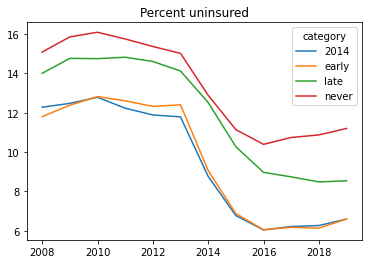

In [22]:
# Easiest syntax, if your data is in the format created by stacking and unstacking
grouped.plot(title="Percent uninsured")

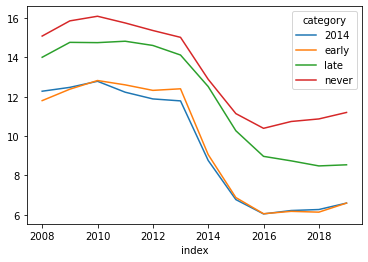

In [23]:
# Or you can directly specify your x and y variables
grouped.reset_index().plot(x='index', y=['2014', 'early', 'late', 'never'])

**5. Next, produce two additional graphs with a similar structure, that illustrate the effect of expanding Medicaid. The first should graph should consider the percentage of state population enrolled in Medicaid, and the second should consider the percentage of state population with private insurance.**


In [24]:
# Originally I got rid of my rows that had anything other than the uninsurance rate, but for
# this section I will want them, so I will return to my original dataset, df_insurance,
# and merge on Medicaid expansion implementation dates, as well as the category designations

df_analysis = pd.merge(df_insurance, df_implementation, left_on='level_0', right_on='State', how='inner')

df_analysis.loc[df_analysis['Expansion Date'].str.endswith('14'),
                'category'] = '2014'
df_analysis.loc[df_analysis['Expansion Date'].str.startswith('Early'),
                'category'] = 'early'
df_analysis.loc[df_analysis['Expansion Date'].str.startswith('not implemented'),
                'category'] = 'never'

df_analysis.loc[df_analysis['Expansion Date'].str.endswith('15'),
                'category'] = 'late'
df_analysis.loc[df_analysis['Expansion Date'].str.endswith('16'),
                'category'] = 'late'
df_analysis.loc[df_analysis['Expansion Date'].str.endswith('17'),
                'category'] = 'late'
df_analysis.loc[df_analysis['Expansion Date'].str.endswith('18'),
                'category'] = 'late'
df_analysis.loc[df_analysis['Expansion Date'].str.endswith('19'),
                'category'] = 'late'

# included in never because uninsurance data ends in 2019
df_analysis.loc[df_analysis['Expansion Date'].str.endswith('20'),
                'category'] = 'never'

In [25]:
df_analysis

,level_0,level_1,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,State,Expansion Date,category
0,Alabama,Total,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,Alabama,not implemented,never
1,Alabama,Any coverage,90.3,90.0,90.6,90.9,89.9,87.9,86.4,86.7,85.7,85.4,86.2,86.7,Alabama,not implemented,never
2,Alabama,Uninsured,9.7,10.0,9.4,9.1,10.1,12.1,13.6,13.3,14.3,14.6,13.8,13.3,Alabama,not implemented,never
3,Alabama,Private,66.9,66.6,66.9,67.9,66.9,65.7,64.8,65.1,64.9,65.4,67.1,69.3,Alabama,not implemented,never
4,Alabama,..Employer-based,54.1,53.6,53.2,53.5,53.2,53.0,52.3,53.7,53.1,53.4,55.4,57.8,Alabama,not implemented,never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,Wyoming,..Direct-purchase,16.0,15.7,15.6,16.3,16.5,14.5,13.1,14.5,12.8,13.4,16.1,17.1,Wyoming,not implemented,never
556,Wyoming,..TRICARE,3.9,4.1,3.6,3.3,3.4,3.3,3.6,3.5,3.9,3.7,3.9,3.8,Wyoming,not implemented,never
557,Wyoming,Public,29.2,27.3,28.3,27.3,26.4,26.0,25.2,27.5,24.9,26.0,25.1,24.6,Wyoming,not implemented,never
558,Wyoming,..Medicaid,11.7,10.3,12.2,12.1,12.0,12.5,11.0,13.9,11.5,12.8,12.0,11.4,Wyoming,not implemented,never


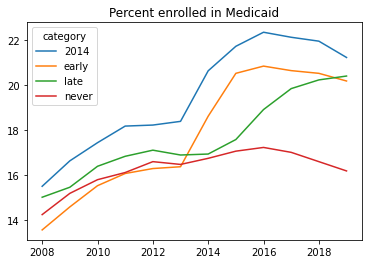

In [26]:
df_medicaid = df_analysis[df_analysis['level_1']=='..Medicaid']
grouped = df_medicaid.groupby('category').mean()
grouped = grouped.stack()
grouped = grouped.unstack(0)
grouped.plot(title="Percent enrolled in Medicaid")

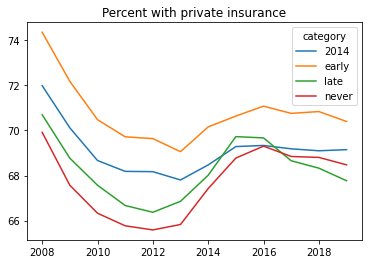

In [27]:
df_private = df_analysis[df_analysis['level_1']=='Private']
grouped = df_private.groupby('category').mean()
grouped = grouped.stack()
grouped = grouped.unstack(0)
grouped.plot(title="Percent with private insurance")

**6. Consider the graphs you made. What can you say about the causal effect of the Medicaid expansion on the uninsured rate? Be specific about how what you have found relates to this question, and be precise about what you can and cannot say with certainty.**


It seems likely there is a causal impact of the Medicaid expansion on the overall uninsured rate. The never-adopting states show a clearly different pattern than the other groups, with a less-extreme declining trend in uninsured rates after the ACA came into effect in 2014. The never-adopting states end up in 2019 with the highest uninsured rate overall by a considerable amount, even though prior to 2016 they looked similar to late-adopting states.

The "Percent Enrolled in Medicaid" graph shows us that the Medicaid expansion is in fact increasing the number of people with insurance through Medicaid. There isn't something weird going on where Medicaid expansion states are decreasing their overall number of uninsured people by some other means. The increases in Medicaid coverage occur at the exact times we'd expect - in 2014 for states that expanded on-time, and 2015-2019 for late expanders. Never expanders don't see noticeable increases in Medicaid coverage, and the rate even appears to be declining in recent years.

Finally, we can consider the private-insurance crowd-out concerns discussed above. Although it is hard to know the counterfactual - would private insurance have increased in the absence of the Medicaid expansion? - we can say that private insurance does not seem to decline in the on-time-adopting and early adopting states. On the other hand, we *do* see declines in private insurance in the late adopting states, which is interesting and indicates that there are possibly some systematic differences in those late-adopting states, which overall look more like the never-adopters than they do the early and on-time adopters, with higher initial rates of uninsured, etc. Perhaps there is some crowd-out in the types of states that adopted late, and this might be relevant to states that have not yet adopted.



**7. (Extra Credit) Conduct a difference-in-differences analysis on the impact of Medicaid expansion on the uninsured rate. Explain any modeling choices you have made in order to conduct this analysis. What assumptions need to hold for you analysis to be valid? Do you believe they hold?**


A very helpful simple explainer of DD can be found __[here](https://www.mailman.columbia.edu/research/population-health-methods/difference-difference-estimation)__. A simple/canonical DD framework, is also described __[here](https://thetarzan.wordpress.com/2011/06/20/differences-in-differences-estimation-in-r-and-stata/)__.

We will first conduct a simple comparison of Medicaid-expansion-adopting and non-adopting states. We will think of the never implementers as the "control" and the implementers as the "treatment." This canonical Difference-in-Difference analysis contrasts the mean outcome (uninsured rate) in states that adopted the policy against states that did not, assuming the states that did not adopt would have otherwise (absent the intervention) followed *parallel trends* with the the states that did, and thus can be used as controls. If this *parallel trends assumption* holds, we can find the *causal effect* of the policy by conducting a double-difference calculation (hence the name).

As is stated in the first DiD explainer above, "although there is no statistical test for this \[the parallel trends\] assumption, visual inspection is useful when you have observations over many time points.'' This is where the plots you made are very helpful. As you can see in the plots above, although the expansion and non-expansion states have different *levels* of their uninsurance rate in the period before 2014, they seem to follow very similar *trends* over time in the period before 2014, across all three metrics we looked at. As long as nothing about their relative trends would have otherwise changed in 2014 absent the ACA/Medicaid expansion, the parallel trends assumption should hold. 

To narrow down to two groups (treatment and control) to compare, I first exclude late adopters from the analysis entirely, rather than choosing to group them with on-time adopters or the never adopters. Looking at the above analysis, these states just look pretty different. They have a higher level of pre-ACA uninsurance rates, looking like the never-adopters before expanding. They show a delayed effect of Medicaid (which would be expected, of course, but complicates a pre-post simple analysis) and have this strange private insurance decline that is unique compared to the other state groups. 

I will further group early adopters with 2014 adopters. We know that while they adopted some elements of the expansion early, they also are counted by some sources as expanding in 2014 because all provisions finally came into force then. They also look very similar to the 2014 adopters when plotted on the above graphs.

The below code is intended as a further example/tutorial, but you could have done this many ways.

We first compare means of each of the two groups, before and after 2014:


In [28]:
df_analysis = df_analysis_uninsured[df_analysis_uninsured['category'] != 'late']
df_analysis = df_analysis.drop(columns=['level_0', 'level_1', 'Expansion Date']).set_index(['State', 'category']).stack().reset_index()
df_analysis.columns = ['State', 'category', 'year', 'UninsuredRate']
df_analysis['AdoptedMedicaid'] = (df_analysis['category'] != 'never') * 1

In [29]:
df_analysis

,State,category,year,UninsuredRate,AdoptedMedicaid
0,Alabama,never,2019,9.7,0
1,Alabama,never,2018,10.0,0
2,Alabama,never,2017,9.4,0
3,Alabama,never,2016,9.1,0
4,Alabama,never,2015,10.1,0
...,...,...,...,...,...
523,Wyoming,never,2012,15.4,0
524,Wyoming,never,2011,15.4,0
525,Wyoming,never,2010,14.9,0
526,Wyoming,never,2009,15.2,0


In [30]:
pre = df_analysis[df_analysis['year']<2014].groupby('AdoptedMedicaid').mean()['UninsuredRate']
pre

AdoptedMedicaid
0    15.519608
1    12.266049
Name: UninsuredRate, dtype: float64

In [31]:
post = df_analysis[df_analysis['year']>=2014].groupby('AdoptedMedicaid').mean()['UninsuredRate']
post

AdoptedMedicaid
0    11.204902
1     6.788272
Name: UninsuredRate, dtype: float64

In [32]:
diff1 = post-pre
diff1

AdoptedMedicaid
0   -4.314706
1   -5.477778
Name: UninsuredRate, dtype: float64

In [33]:
diff1[1]-diff1[0]

-1.163071895424837

In other words, the Medicaid expansion states had an uninsured rate that was 1.3 percentage points lower than they otherwise would have had they not adopted the expansion, *if* we assume that nonexpansion states are good controls for expansion states (i.e. if the parallel trends assumption holds). 

A more advanced approach is to use a regression framework to get the same exact estimates that we just found, and this will also give us standard errors to assess statistical significance:

$Y= β0 + β1*AfterImplementation + β2*HadIntervention + β3*AfterImplementation*HadIntervention +ε$

In [34]:
df_analysis['AfterMedicaid'] = (df_analysis['year'] >= 2014) * 1
df_analysis['Interaction'] = df_analysis['AdoptedMedicaid'] * df_analysis['AfterMedicaid']
df_analysis

,State,category,year,UninsuredRate,AdoptedMedicaid,AfterMedicaid,Interaction
0,Alabama,never,2019,9.7,0,1,0
1,Alabama,never,2018,10.0,0,1,0
2,Alabama,never,2017,9.4,0,1,0
3,Alabama,never,2016,9.1,0,1,0
4,Alabama,never,2015,10.1,0,1,0
...,...,...,...,...,...,...,...
523,Wyoming,never,2012,15.4,0,0,0
524,Wyoming,never,2011,15.4,0,0,0
525,Wyoming,never,2010,14.9,0,0,0
526,Wyoming,never,2009,15.2,0,0,0


In [35]:
model = ols("UninsuredRate ~ AdoptedMedicaid + AfterMedicaid + Interaction", df_analysis).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:          UninsuredRate   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     159.2
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           2.50e-73
Time:                        21:42:10   Log-Likelihood:                -1378.7
No. Observations:                 528   AIC:                             2765.
Df Residuals:                     524   BIC:                             2782.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          15.5196      0.327     

As you should be able to see, the coefficients of this regression map perfectly onto the means we calculated in our two-way DiD table. The regression does give us the additional information that all four coefficients are statistically significant, i.e., we can reject the null hypothesis that Medicaid expansion states were not different from non-Medicaid expansion states in their uninsured rate, after the Medicaid expansion was implemented in 2014. Because of this, if our identifying assumption of *otherwise parallel trends* in the adopting and non-adopting states holds,  we can state with some confidence that the Medicaid expansion had a *causal* impact on the uninsured rate in states that implemented the program.